In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("../dataset/Cleaned_Womens_Clothing_Reviews.csv")


In [25]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [27]:
df.drop(columns=['Unnamed: 0'])

Clothing ID  Age                                              Title  \
0             1080   34                                                NaN   
1             1077   60                            Some major design flaws   
2             1049   50                                   My favorite buy!   
3              847   47                                   Flattering shirt   
4             1080   49                            Not for the very petite   
...            ...  ...                                                ...   
23327         1104   34                     Great dress for many occasions   
23328          862   48                         Wish it was made of cotton   
23329         1104   31                              Cute, but see through   
23330         1084   28  Very cute dress, perfect for summer parties an...   
23331         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Love this dress!  it's sooo pretty.  i happene...       5   
1      I had such high hopes for this dress and reall...       3   
2      I love, love, love this jumpsuit. it's fun, fl...       5   
3      This shirt is very flattering to all due to th...       5   
4      I love tracy reese dresses, but this one is no...       2   
...                                                  ...     ...   
23327  I was very happy to snag this dress at such a ...       5   
23328  It reminds me of maternity clothes. soft, stre...       3   
23329  This fit well, but the top was very see throug...       3   
23330  I bought this dress for a wedding i have this ...       3   
23331  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        4         General   
1                    0                        0         General   
2                    1                        0  General Petite   
3                    1                        6         General   
4                    0                        4         General   
...                ...                      ...             ...   
23327                1                        0  General Petite   
23328                1                        0  General Petite   
23329                0                        1  General Petite   
23330                1                        2         General   
23331                1                       22  General Petite   

      Department Name Class Name  
0             Dresses    Dresses  
1             Dresses    Dresses  
2             Bottoms      Pants  
3                Tops    Blouses  
4             Dresses    Dresses  
...               ...        ...  
23327         Dresses    Dresses  
23328            Tops      Knits  
23329         Dresses    Dresses  
23330         Dresses    Dresses  
23331         Dresses    Dresses  

[23332 rows x 10 columns]

In [33]:
features = df[['Age', 'Rating', 'Positive Feedback Count', 'Class Name']]
target = df['Recommended IND']

features_encoded = pd.get_dummies(features, columns=['Class Name'])

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [35]:
svm = SVC(kernel='rbf')
svm.fit(X_train_pca, y_train)

SVC()

In [36]:
y_pred = svm.predict(X_test_pca)

In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.41      0.56       839
           1       0.88      0.99      0.93      3828

    accuracy                           0.88      4667
   macro avg       0.88      0.70      0.75      4667
weighted avg       0.88      0.88      0.87      4667



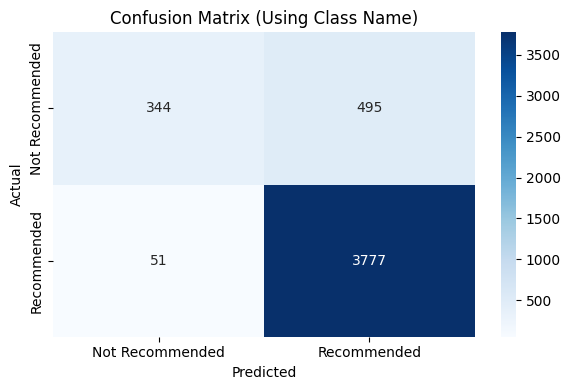

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix (Using Class Name)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [43]:

new_input = pd.DataFrame([{
    'Age': 35,
    'Rating': 4,
    'Positive Feedback Count': 8,
    'Class Name': 'Dresses'
}])


new_input_encoded = pd.get_dummies(new_input)


new_input_encoded = new_input_encoded.reindex(columns=X_train.columns, fill_value=0)


new_input_scaled = scaler.transform(new_input_encoded)
new_input_pca = pca.transform(new_input_scaled)

new_pred = svm.predict(new_input_pca)

print("Predicted Recommendation:", "Yes 👍" if new_pred[0] == 1 else "No 👎")


Predicted Recommendation: Yes 👍
